# Part 3 - Rotation Curve of The Galaxy NGC7814

In this notebook, we plot the rotation curve of NGC7814. We then inspect in detail the velocity of each luminous components (bulge, disk, and gas) and calculate the total velocity of only the luminous components. We notice that there are some discrepancies between the observed velocity and the total velocity of the luminous components. We then add the velocity of dark matter component and find that it perfectly matches the observed velocity. This proves the existence of dark matter!

### Part A: Plot The Observed Velocity

In [2]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from scipy.interpolate import InterpolatedUnivariateSpline

In [3]:
# Pick a galaxy and load the dataset of that galaxy
chosengalaxy = 'NGC7814'
Rad, Vobs, errV, Vgas, Vdisk, Vbul, SBdisk, SBbul = np.genfromtxt('rotmod-NGC7814.dat', skip_header=3, unpack=True)

In [4]:
# Get the distance of the galaxy from the dataset
firstline = open('rotmod-NGC7814.dat').readline()         # Open the data file
firstline = firstline.split()                             # Split the first line into separate strings
distance = float(firstline[3])                            # Take the 4th value of the first line (counts: 0,1,2,3...)
print("The distance to {} galaxy is {} Mpc.".format(chosengalaxy,distance))

The distance to NGC7814 galaxy is 14.4 Mpc.


In [5]:
# Spline function
def interpd(x,y):
    return InterpolatedUnivariateSpline(x,y,k=3)      # Degree of the smoothing spline: 3

# Bulge
def bulge(r,bpref):
    polynomial = interpd(Rad,bpref*Vbul)              # bpref is the bulge prefactor added to the bulge
    return polynomial(r)

# Disk
def disk(r,dpref):
    polynomial = interpd(Rad,dpref*Vdisk)             # dpref is the disk prefactor added to the disk
    return polynomial(r)

# Gas 
def gas(r):
    polynomial = interpd(Rad,Vgas)                    # Note that the gas doesn't have a prefactor
    return polynomial(r)

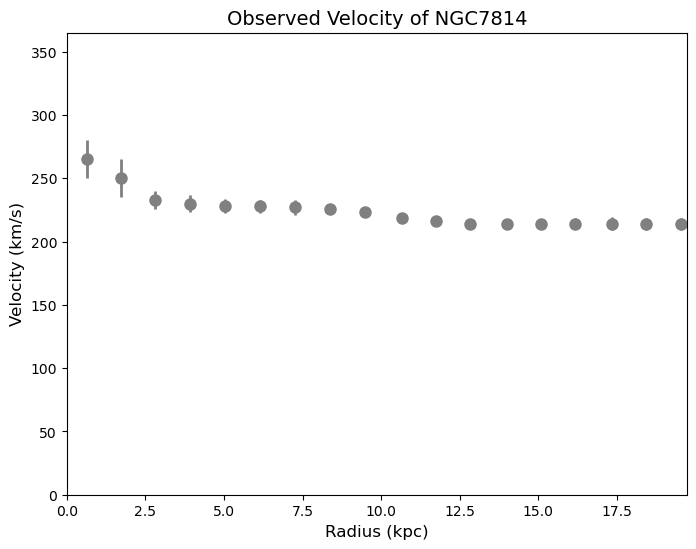

In [6]:
# Create the plot of the observed velocity
plt.figure(figsize=(8,6),dpi=100)
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.xlabel('Radius (kpc)',size=12)
plt.ylabel('Velocity (km/s)',size=12)
plt.title(str('Observed Velocity of ' + chosengalaxy), size=14)
plt.xlim(0,np.max(Rad)+0.2)
plt.ylim(0,np.max(Vobs)+100)
plt.show() 

### Part B: Plot The Velocity for Each Luminous Components and The Total Velocity of The Luminous Components

In [7]:
# Prefactors
pref_bulge = 0.8
pref_disk = 0.8

# Radius for plotting
radius = np.linspace(np.min(Rad),np.max(Rad),1000)

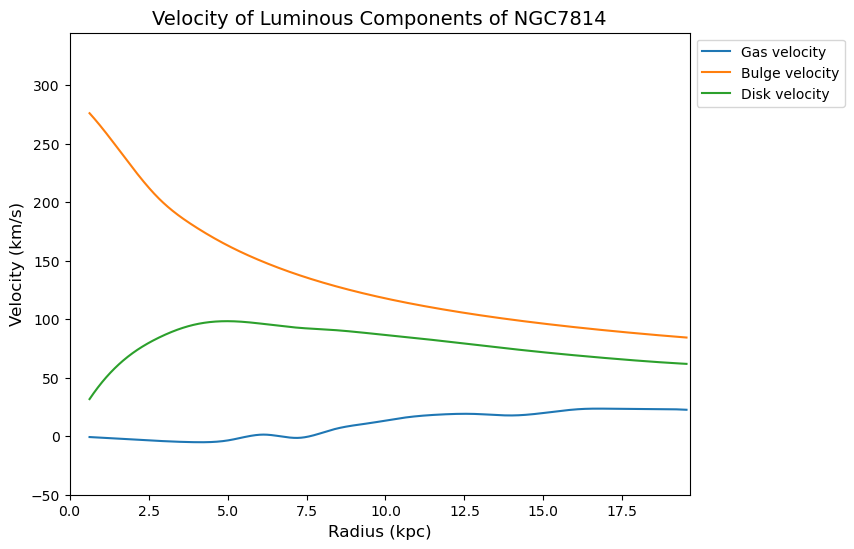

In [8]:
# Create the plot of the luminous components only
plt.figure(figsize=(8,6),dpi=100)
plt.plot(radius, gas(radius),              label="Gas velocity")
plt.plot(radius, bulge(radius,pref_bulge), label="Bulge velocity")
plt.plot(radius, disk(radius,pref_disk),   label="Disk velocity")
plt.xlabel('Radius (kpc)',  size=12)
plt.ylabel('Velocity (km/s)', size=12)
plt.title(str('Velocity of Luminous Components of ' + chosengalaxy), size=14)
plt.xlim(0,np.max(Rad + 0.1))
plt.ylim(-50,np.max(Vobs + 80))
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

Data for NGC7814
* Central mass density = 1.524e8 (in solar mass/kpc^3), Source: Fraternali et al. (2011) 
* Core radius = 2.1 (in kpc), Source: Fraternali et al. (2011) 

In [9]:
# Define some constants
rho0 = 1.524e8                 # central mass density (in solar mass/kpc^3)
rc = 2.1                       # core radius (in kpc)
G = 4.300e-6                   # Gravitational constant (kpc/solar mass*(km/s)^2)

In [10]:
# Define the function that will calculate the total velocity of the luminous components
def total_velocity_light(r,pref_bulge,pref_disk):             
    return np.sqrt(gas(r)**2 + bulge(r,pref_bulge)**2 + disk(r,pref_disk)**2)

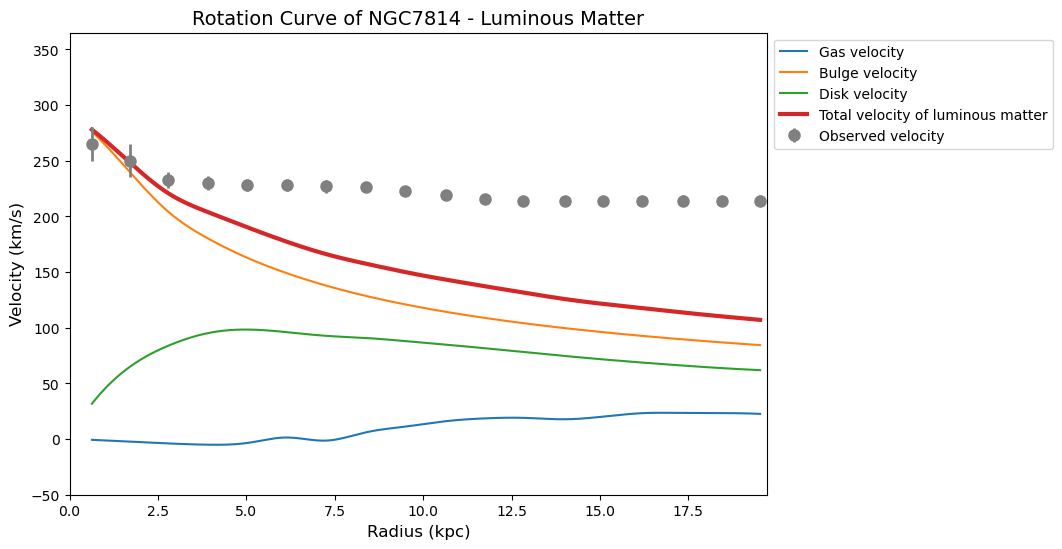

In [11]:
# Create the plot of the luminous matter and the observed velocity
plt.figure(figsize=(9,6),dpi=100)
plt.plot(radius, gas(radius),               label="Gas velocity",   color='#1f77b4')
plt.plot(radius, bulge(radius,pref_bulge),  label="Bulge velocity", color='#ff7f0e')
plt.plot(radius, disk(radius,pref_disk),    label="Disk velocity",  color='#2ca02c')
plt.plot(radius,total_velocity_light(radius,pref_bulge,pref_disk), \
         label="Total velocity of luminous matter", color='#d62728', linewidth=3)
plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('Radius (kpc)',size=12)
plt.ylabel('Velocity (km/s)',size=12)
plt.title(str('Rotation Curve of ' + chosengalaxy + ' - Luminous Matter'), size=14)
plt.xlim(0,np.max(Rad + 0.2))
plt.ylim(-50,np.max(Vobs) + 100)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

### Part C: Add Dark Matter!

In [12]:
# Define the function that will calculate the total velocity of the luminous components
def halo(r,rho0,rc):
    v = np.sqrt(4*np.pi*G*rho0*rc**2*(1 - rc/r * np.arctan(r/rc)))
    return v

In [13]:
# Define the function that will calculate the total velocity with dark matter
def total_velocity_withDM(r,pref_bulge,pref_disk,rho0,rc):             
    return np.sqrt(gas(r)**2 + bulge(r,pref_bulge)**2 + disk(r,pref_disk)**2 + halo(r,rho0,rc)**2)

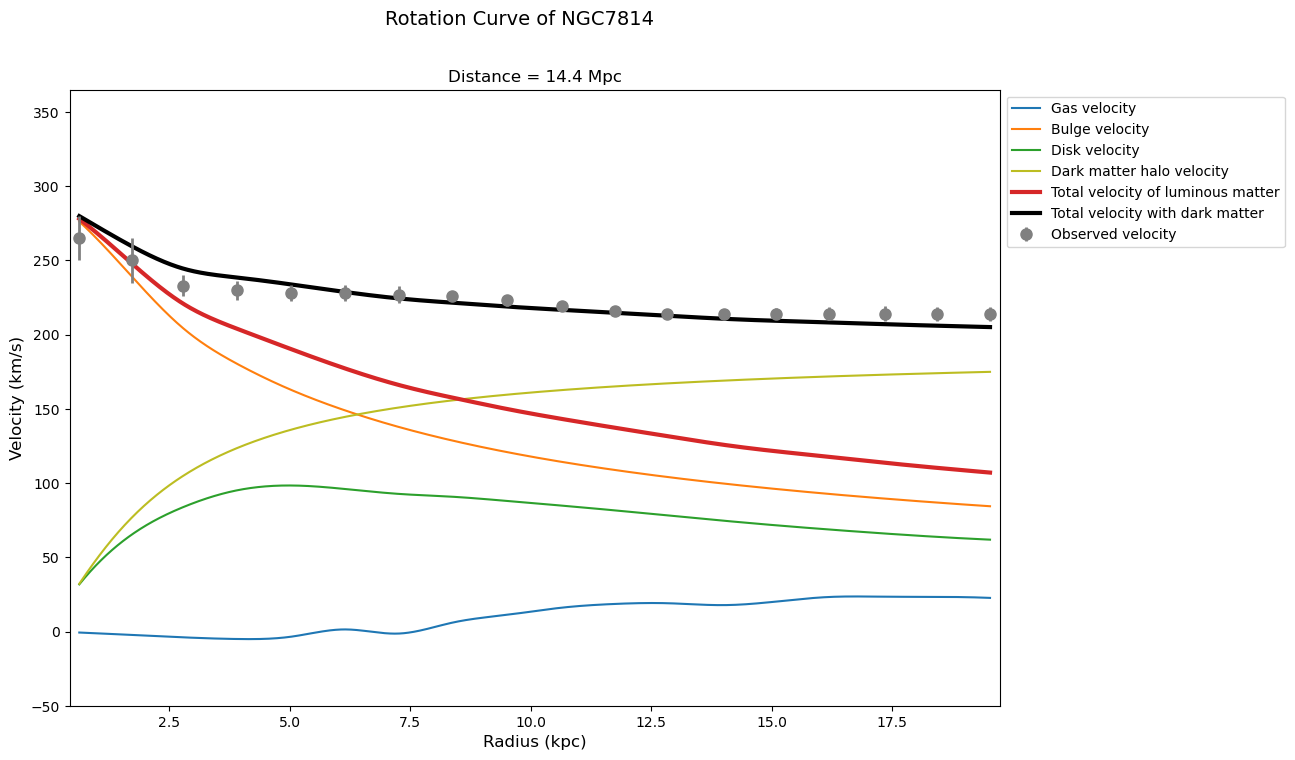

In [14]:
# Create the plot of the luminous matter, the total velocity with dark matter, and the observed velocity
plt.figure(figsize=(12,8),dpi=100)

plt.plot(radius, gas(radius),              label="Gas velocity",   color='#1f77b4')
plt.plot(radius, bulge(radius,pref_bulge), label="Bulge velocity", color='#ff7f0e')
plt.plot(radius, disk(radius,pref_disk),   label="Disk velocity",  color='#2ca02c')
plt.plot(radius, halo(radius,rho0,rc),     label="Dark matter halo velocity",  color='#bcbd22')

plt.plot(radius,total_velocity_light(radius,pref_bulge,pref_disk), \
         label="Total velocity of luminous matter", color='#d62728', linewidth=3)
plt.plot(radius,total_velocity_withDM(radius,pref_bulge,pref_disk,rho0,rc), \
         label="Total velocity with dark matter", color='k', linewidth=3)

plt.errorbar(Rad,Vobs,yerr=errV, marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2, label = "Observed velocity")
plt.xlabel('Radius (kpc)',size=12)
plt.ylabel('Velocity (km/s)',size=12)
plt.suptitle(str('Rotation Curve of ' + chosengalaxy), size=14)
plt.title(str('Distance = {} Mpc'.format(distance)), size=12)
plt.xlim(np.min(Rad - 0.2),np.max(Rad + 0.2))
plt.ylim(-50,np.max(Vobs) + 100)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("RotationNGC7814.png")